In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
data= pd.read_csv('/content/Credit_Card_Fraud_Detection.csv')
data

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
print(data.head())
print(data.tail())

   Unnamed: 0  Customer_ID  A_1    A_2    A_3  A_4  A_5  A_6    A_7  A_8  A_9  \
0           0     15776156    1  22.08  11.46    2    4    4  1.585    0    0   
1           1     15739548    0  22.67   7.00    2    8    4  0.165    0    0   
2           2     15662854    0  29.58   1.75    1    4    4  1.250    0    0   
3           3     15687688    0  21.67  11.50    1    5    3  0.000    1    1   
4           4     15715750    1  20.17   8.17    2    6    4  1.960    1    1   

   A_10  A_11  A_12  A_13  A_14  class  
0     0     1     2   100  1213      0  
1     0     0     2   160     1      0  
2     0     1     2   280     1      0  
3    11     1     2     0     1      1  
4    14     0     2    60   159      1  
     Unnamed: 0  Customer_ID  A_1    A_2     A_3  A_4  A_5  A_6    A_7  A_8  \
685         685     15808223    1  31.57  10.500    2   14    4  6.500    1   
686         686     15769980    1  20.67   0.415    2    8    4  0.125    0   
687         687     15675450  

In [7]:
data.columns

Index(['Unnamed: 0', 'Customer_ID', 'A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'A_6',
       'A_7', 'A_8', 'A_9', 'A_10', 'A_11', 'A_12', 'A_13', 'A_14', 'class'],
      dtype='object')

In [9]:
data.shape

(690, 17)

In [13]:
data.ndim

2

In [11]:
data.dtypes

Unnamed: 0       int64
Customer_ID      int64
A_1              int64
A_2            float64
A_3            float64
A_4              int64
A_5              int64
A_6              int64
A_7            float64
A_8              int64
A_9              int64
A_10             int64
A_11             int64
A_12             int64
A_13             int64
A_14             int64
class            int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   690 non-null    int64  
 1   Customer_ID  690 non-null    int64  
 2   A_1          690 non-null    int64  
 3   A_2          690 non-null    float64
 4   A_3          690 non-null    float64
 5   A_4          690 non-null    int64  
 6   A_5          690 non-null    int64  
 7   A_6          690 non-null    int64  
 8   A_7          690 non-null    float64
 9   A_8          690 non-null    int64  
 10  A_9          690 non-null    int64  
 11  A_10         690 non-null    int64  
 12  A_11         690 non-null    int64  
 13  A_12         690 non-null    int64  
 14  A_13         690 non-null    int64  
 15  A_14         690 non-null    int64  
 16  class        690 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 91.8 KB


In [12]:
data.describe()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
count,690.000000,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,344.500000,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,199.330128,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,172.250000,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,344.500000,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,516.750000,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,689.000000,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [14]:
data.isnull().sum()

Unnamed: 0     0
Customer_ID    0
A_1            0
A_2            0
A_3            0
A_4            0
A_5            0
A_6            0
A_7            0
A_8            0
A_9            0
A_10           0
A_11           0
A_12           0
A_13           0
A_14           0
class          0
dtype: int64

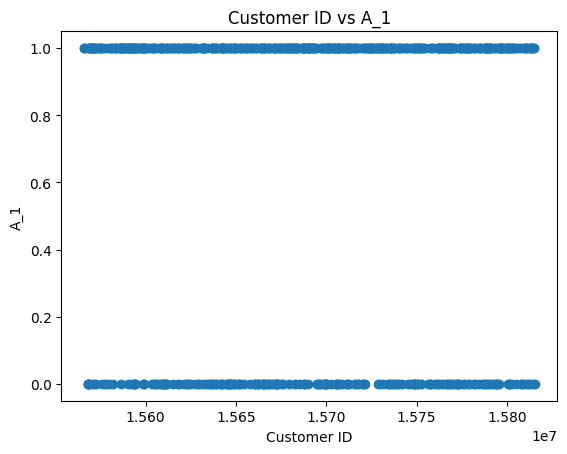

In [20]:
plt.scatter(data["Customer_ID"],data["A_1"])
plt.xlabel("Customer ID")
plt.ylabel("A_1")
plt.title("Customer ID vs A_1")

plt.show()

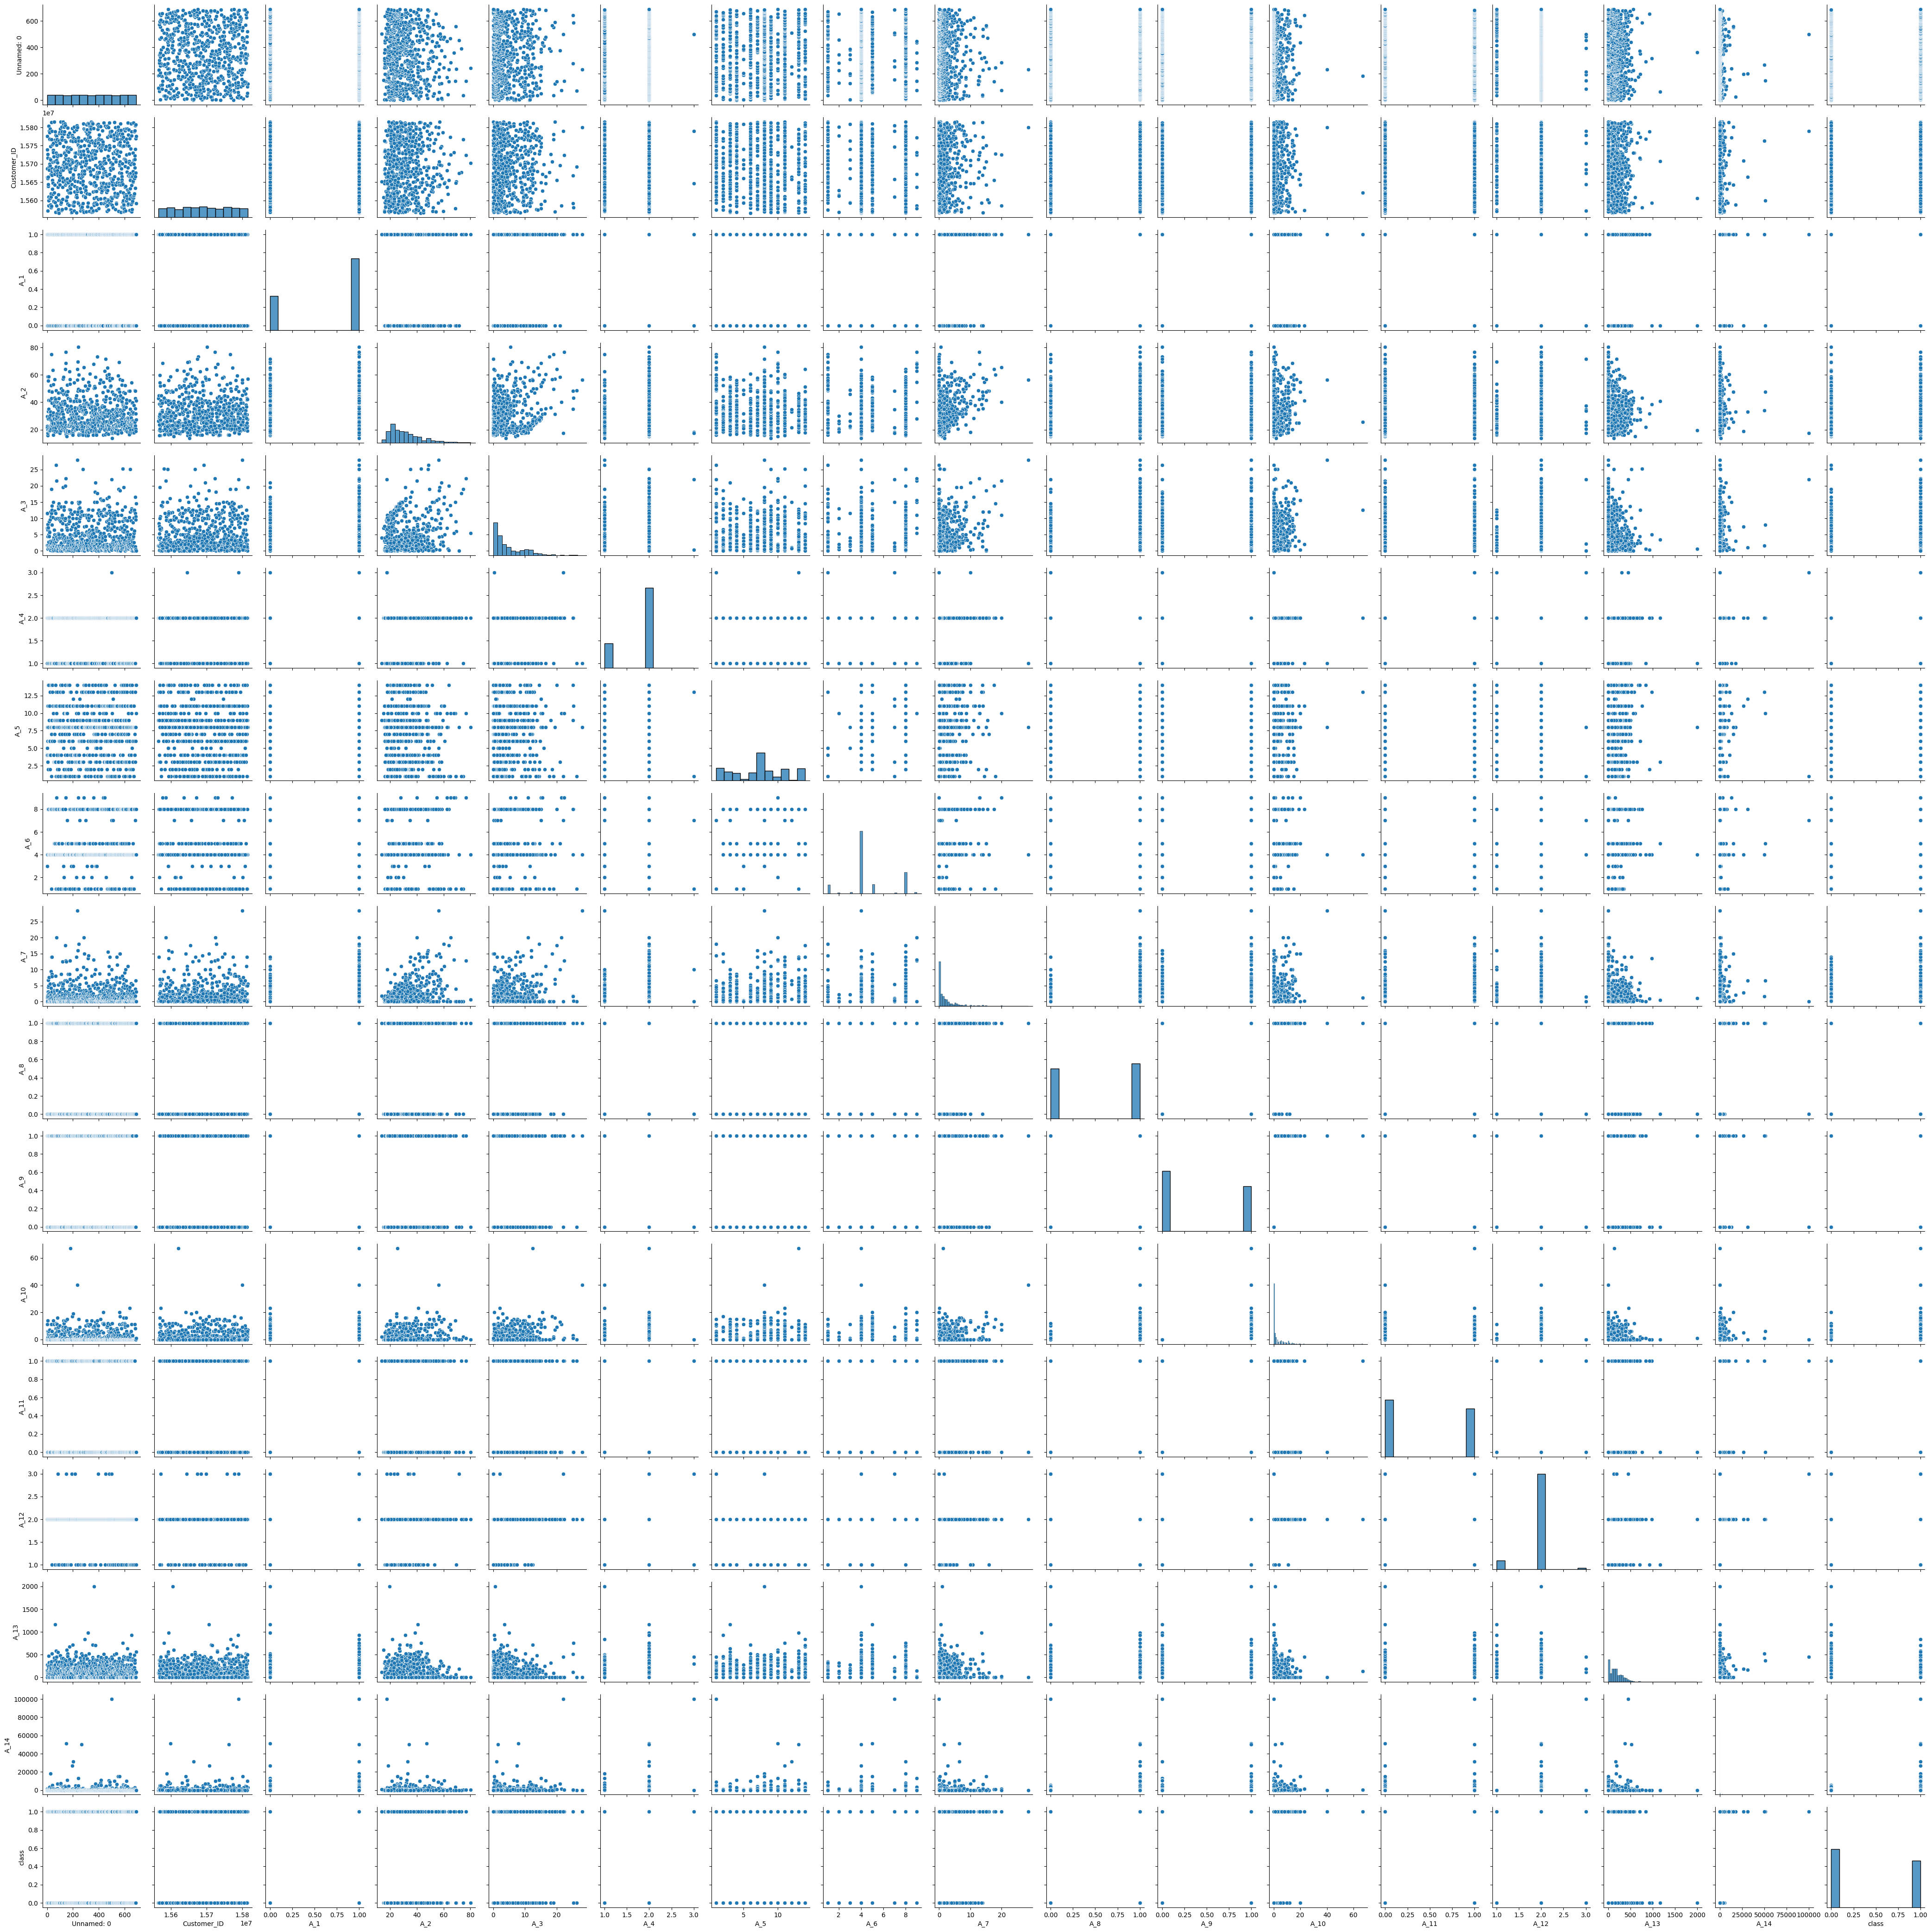

In [21]:
sns.pairplot(data=data)

In [23]:
dependent_variable = ['A_1', 'A_2', 'A_3']
independent_variables = ['Customer_ID']

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_data[independent_variables]
y_train = train_data[dependent_variable]

X_test = test_data[independent_variables]
y_test = test_data[dependent_variable]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 56.18612450287617
Mean Absolute Error: 4.564362363513529
R2 Score: -0.006661324491753939
